# Assignment 3 - Building a Custom Visualization

Nesta tarefa, você deve escolher uma das opções apresentadas abaixo e enviar um visual, bem como seu código-fonte, para avaliação por pares. Os detalhes de como você resolve a tarefa dependem de você, embora sua tarefa deva usar matplotlib para que seus colegas possam avaliar seu trabalho. As opções diferem em nível de desafio, mas não há notas associadas ao nível de desafio que você escolheu. No entanto, seus colegas serão solicitados a garantir que você tenha pelo menos uma qualidade mínima para uma determinada técnica para passar. Implemente a técnica totalmente (ou exceda-a!) e você poderá obter notas completas para a tarefa.

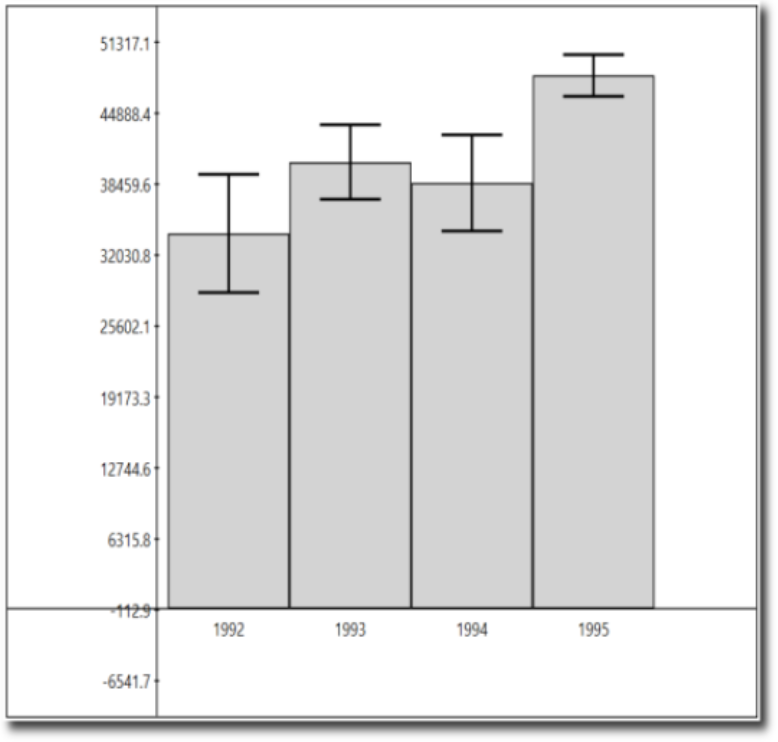
**Figura 1 de (Ferreira et al, 2014).**


Um desafio que os usuários enfrentam é que, para um determinado valor do eixo y (por exemplo, 42.000), é difícil saber quais valores do eixo x são mais representativos, porque os níveis de confiança se sobrepõem e suas distribuições são diferentes (os comprimentos das barras do intervalo de confiança são desiguais). Uma das soluções que os autores propõem para esse problema (Figura 2c) é permitir que os usuários indiquem o valor do eixo y de interesse (por exemplo, 42.000) e depois desenhem uma linha horizontal e barras coloridas com base nesse valor. Portanto, as barras podem ser coloridas em vermelho se estiverem definitivamente acima desse valor (dado o intervalo de confiança), em azul se estiverem definitivamente abaixo desse valor ou em branco se contiverem esse valor.
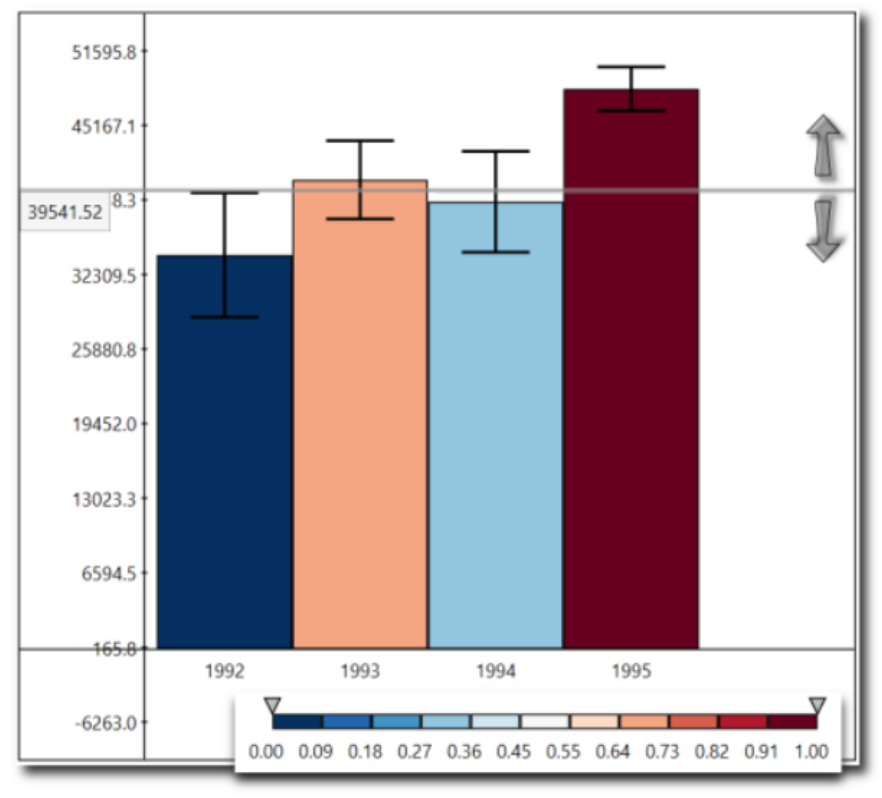
**Figura 2c de (Ferreira et al. 2014). Observe que a legenda da barra de cores na parte inferior, bem como as setas, não são necessárias nas descrições de atribuição abaixo**

**Opção mais fácil:** implemente a coloração da barra conforme descrito acima - uma escala de cores com apenas três cores (por exemplo, azul, branco e vermelho). Suponha que o usuário forneça o valor do eixo y de interesse como um parâmetro ou variável.


**Opção mais difícil:** implemente a coloração da barra conforme descrito no artigo, onde a cor da barra é realmente baseada na quantidade de dados cobertos (por exemplo, um gradiente variando de azul escuro para a distribuição certamente abaixo desse eixo y , para branco se o valor estiver certamente contido, para vermelho escuro se o valor certamente não estiver contido, pois a distribuição está acima do eixo).

**Opção ainda mais difícil:** adicione interatividade ao acima, que permite ao usuário clicar no eixo y para definir o valor de interesse. As cores da barra devem mudar em relação ao valor selecionado pelo usuário.

**Opção mais difícil:** permitir que o usuário defina interativamente um intervalo de valores y nos quais está interessado e recolorir com base nisso (por exemplo, uma banda do eixo y, consulte o artigo para obter mais detalhes).

---

*Observação: os dados fornecidos para esta atribuição não são os mesmos dados usados ​​no artigo e, como resultado, as visualizações podem parecer um pouco diferentes.*


In [78]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [79]:
inter = df.std(axis = 1)/np.sqrt(df.shape[1])# pegando o intervalo de confiança de cada ano 
media = df.mean(axis = 1) #armazenando as medias de cada ano 
range = np.mean(media.values) #pegando a media das medias de cada ano 



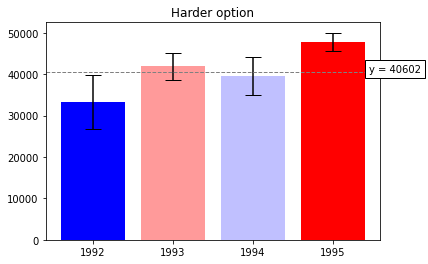

In [109]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
%matplotlib inline


#Um intervalo de confiança de 95% para a distribuição normal padrão, então, é o intervalo 
#(-1,96, 1,96), pois 95% da área sob a curva está dentro desse intervalo.
confianca = Normalize(vmin=-1.96, vmax=1.96)


cmap = get_cmap('bwr') #pegando as cores blue, white e red
color = pd.DataFrame([]) #criando um DF
#distribuindo as intensidades de cores atraves de uma distribuição normal
color['intervalos'] = confianca((media-range)/inter) 
#aplicando cor dependendo do valor  
color['cor'] = [cmap(x) for x in color['intervalos']] 


#plotando as barras 
plt.bar(df.index, media, yerr = inter*1.96,color = color['cor'],capsize = 8)
#plotando a linha com o valor escolhido pelo usuario neste caso eu decidi pegar as medias das medias (range)
plt.axhline(y=range, color='gray', linewidth=1, linestyle='--')
#informando o valor do range 
plt.text(1995.45, range, 'y = %d' %range, bbox=dict(fc='white',ec='k'))

#colocando os anos no xticks
plt.title('Harder option')
plt.xticks(df.index, ('1992', '1993', '1994', '1995'));
plt.savefig('solved.png')